## Distribuições de Probabilidade

#### Um pouco sobre as principais distribuições de probabilidade existentes.

Um pouco do que vimos até agora...

   - Pensamos o mundo probabilisticamente, a partir dos conceitos de **experimento aleatório, eventos e probabilidades.**
   - Vimos como trabalhar com **variáveis aleatórias** para lidar *quantitativamente* com a incerteza.
   - E, com isso, definimos formas de se resumir o comportamento dessas variáveis através de **medidas descritivas,** com o valor esperado e a variância.

**A distribuição de probalidade de uma variável aleatória apresenta visualmente o seu comportamento esperado. Podemos ver nela o seu valor esperado, a sua mediana (e demais percentis) e um pouco de sua variabilidade esperada.**

Text(0.5, 0, 'x')

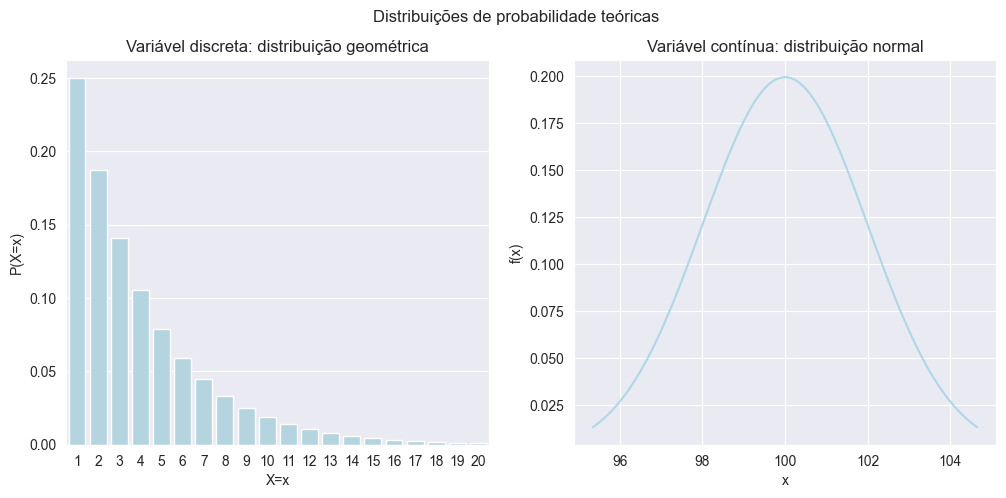

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import geom, norm
import numpy as np


# Parâmetros das distribuições de probabilidade:
probabilidade = 0.25
valor_esperado, desvio_padrao = 100, 2
dominio = np.linspace(norm.ppf(0.01, valor_esperado, desvio_padrao), norm.ppf(0.99, valor_esperado, desvio_padrao), 100)

# Gráficos de distribuições de probabilidade:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distribuições de probabilidade teóricas')
sns.barplot(x=list(range(1, 21)), y=[geom.pmf(x, probabilidade) for x in range(1, 21)], color='lightblue', ax=ax1)
sns.lineplot(x=dominio, y=norm.pdf(dominio, valor_esperado, desvio_padrao), color='lightblue', ax=ax2)
ax1.set_title('Variável discreta: distribuição geométrica'); ax2.set_title('Variável contínua: distribuição normal')
ax1.set_ylabel('P(X=x)'); ax2.set_ylabel('f(x)'); ax1.set_xlabel('X=x'); ax2.set_xlabel('x')

#### O que são e por que estudar as principais distribuições de probabilidade?

Para além de ferramentas estatísticas, o conceito de variável aleatória nos traz um conjunto de **distribuições de probabilidades teóricas** que podem ser muito úteis, principalmente porque elas foram *pensadas a partir de tipos de fenômenos que aparecem com recorrência no mundo real.*

Essas distribuições teóricas são usadas, basicamente, para dois tipos de uso:

   - **Inferência estatística,** ou seja, decisões data-driven considerando a incerteza a partir de procedimentos que utilizam distribuições de probabilidade bastante conhecidas.
   - **Simulações,** onde tentamos entender, ou mesmo prever, o comportamento de variáveis com base em repetições de variáveis aleatórias *artificiais*.

Em vídeos futuros, iremos discutir sobre [experimentos de Monte Carlo](https://aws.amazon.com/pt/what-is/monte-carlo-simulation/) e, logo mais, sobre a inferência estatística. Mas antecipando um pouco do racional do uso dessas distribuições teóricas:

   - Iremos supor que uma variável do nosso interesse assume uma dada distribuição, dentre aquelas teóricas que iremos ver aqui.
   - Usando dessas distribuições teóricas, vamos projetar probabilidades que a variável de interesse assuma determinados valores a partir dessa distribuição assumida.

#### Como iremos aprender sobre as principais distribuições de probabilidade?

O conteúdo deste material é essencialmente voltado para a prática, por isso que utilizamos um Jupyter notebook para apresentar os conceitos que iremos discutir.

Para cada uma das principais distribuições de probabilidade, veremos:

1. A **caracterização da distribuição**, a partir da sua função de probabilidade, do valor esperado, da variância e de seus principais parâmetros (ou seja, aquelas constantes que definem a distribuição).
2. Como gerar **valores simulados** a partir da distribuição.
    * *É a partir disso que podemos implementar simulações, como os experimentos de Monte Carlo.*
3. Como **visualizar a distribuição de probabilidade** de um conjunto de valores simulados.
4. **Exemplos deaplicação**, ou seja, exemplos de variáveis aleatórias *reais* que podem assumir essa distribuição *teórica*.

**Sumário:**
1. [Variáveis aleatórias discretas](#discretas)<a href='#discretas'></a>.
    * [Distribuição de bernoulli](#bernoulli)<a href='#bernoulli'></a>.
    * [Distribuição geométrica](#geometrica)<a href='#geometrica'></a>.
    * [Distribuição Poisson](#poisson)<a href='#poisson'></a>.
<br>

2. [Variáveis aleatórias contínuas](#continuas)<a href='#continuas'></a>.
    * [Distribuição uniforme](#uniforme)<a href='#uniforme'></a>.
    * [Distribuição normal](#normal)<a href='#normal'></a>.
<br>

3. [Tópicos adicionais](#adicionais)<a href='#adicionais'></a>.

A relação de distribuição de probabilidade apresentadas aqui é bem pequena em comparaçao com a diversidade de distribuição teóricas existentes. Quando sentir necessidade, veja neste [link](https://en.wikipedia.org/wiki/List_of_probability_distributions) uma lista exaustiva de distribuições. Algumas das distribuições mais interessantes não discutidas aqui são: *binomial, multinomial, hipergeométrica, gamma, qui-quadrado, F*. Além disso, caso sinta necessidade, dê uma olhada na [distribuição normal multivariada](https://en.wikipedia.org/wiki/Multivariate_normal_distribution), que se aplica quando temos um conjunto de duas ou mais variáveis, todas distribuídas de acordo com a distribuição normal.

## Variáveis aleatórias discretas

*Disclaimer*

Lembre que a distinção entre variáveis aleatórias discretas e variáveis aleatórias contínuas olha para os valores que as variáveis podem assumir: respectivamente, valores *enumeráveis* e *não enumeráveis*.

Então, na prática, o que define se uma variável *real* é discreta ou contínuas é o conjunto de valores que ela assume, **considerando a amostra de dados que temos à diposição**.

### Distribuição de Bernoulli

#### Definições

Uma variável aleatória $X$ tem **distribuição de Bernoulli** quando pode assumir apenas dois valores, sintetizados em $X = 1$ ou $X = 0$.

*Temos discutido um caso prático de distribuição de Bernoulli com nossa aplicação ode oferta de produto a um cliente e observação, após um tempo, se esse cliente contrata o produto ofertado ou não. Nesse caso, $X = 1$ no caso de contratação e $X = 0$ caso não ocorra contratação.*
<br>
Se uma variável aleatória $X$ tem distribuição de Bernoulli, sua **distribuição de probabilidade** parte da seguinte expressão matemática:

$(P(X = x) = p^x(1-p)^{(1-x)})$

Onde $p$ é a probabilidade de ocorrência de $X = 1$, digamos, da compra do produto após oferta de marketing.
<br>
Da definição que vimos de **valor esperado**, outra característica de uma variável aleatória $X$ que tem distribuição de Bernoulli é:

$E(X) = 1*[p^1(1-p)^{1-1}] + 0*[p^0(1-p)^{1-0}] = p$

$E(X) = p + 0 = p$

Além disso, da definição de **variância**:

$Var(X) = p(1-p)$
<br>

O **principal parâmetro**, portanto, de uma variável dop tipo Bernoulli é a probabilidade $p$.

#### Distribuição de Bernoulli em Python

Visualizando a distribuição de probabilidade

Text(0.5, 1.0, 'Distribuição de probabilidade de uma variável de Bernoulli')

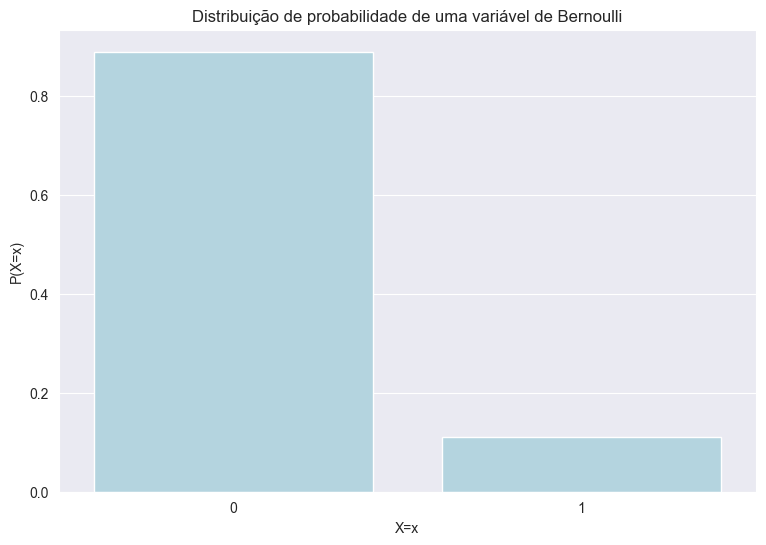

In [2]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.
from scipy.stats import bernoulli # Função para construção de uma distribuição de Bernoulli.

probabilidade = 0.11 # Parâmetro da probabilidade de sucesso do evento de interesse.

# Gráfico da distribuição de probabilidade de uma variável de Bernoulli:
plt.figure(figsize=(9, 6))
sns.barplot(x=list(range(0, 2)), y=[bernoulli.pmf(x, probabilidade) for x in range(0, 2)], color='lightblue')
plt.xlabel('X=x')
plt.ylabel('P(X=x)')
plt.title('Distribuição de probabilidade de uma variável de Bernoulli')

Checando as medidas descritivas

In [3]:
from scipy.stats import bernoulli # Função para construção de uma distribuição de Bernoulli.

probabilidade = 0.11 # Parâmetro da probabilidade de sucesso do evento de interesse (X = 1).

# Calculando as principais medidas dessa distribuição de probabilidade:
valor_esp, variancia = bernoulli.stats(probabilidade)   # Média e variância de Bernoulli.

print(f'Valor esperado: {valor_esp}')
print(f'Variância: {variancia}')

Valor esperado: 0.11
Variância: 0.0979


In [4]:
valor_esp == probabilidade  # Checando a definição do valor esperado.

True

In [5]:
variancia == probabilidade * (1 - probabilidade)  # Checando a definição da variância.

True

Extraindo valores da distribuição

In [6]:
from scipy.stats import bernoulli # Função para construção de uma distribuição de Bernoulli.

probabilidade = 0.11 # Parâmetro da probabilidade de sucesso do evento de interesse (X = 1).

# Simulando valores de uma distribuição de Bernoulli:
simul = bernoulli.rvs(probabilidade, size=100)  # Criando valores que são amostras de uma variável de Bernoulli.
simul

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Histograma dos valores simulados (Bernoulli)')

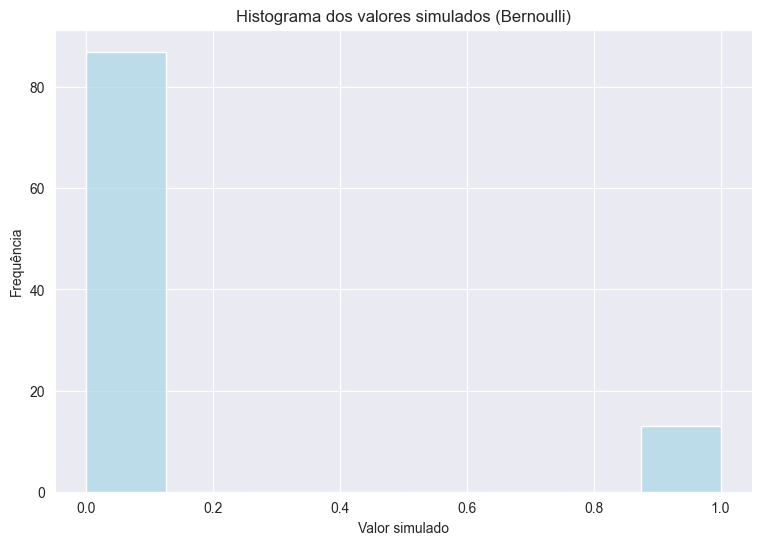

In [7]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.

# Gráfico do histograma dos valores simulados:
plt.figure(figsize=(9, 6))
sns.histplot(x=simul, color='lightblue')
plt.xlabel('Valor simulado')
plt.ylabel('Frequência')
plt.title('Histograma dos valores simulados (Bernoulli)')

Checando a lei dos grandes números

Text(0.5, 1.0, 'Convergência da média para o valor esperado teórico (Bernoulli)')

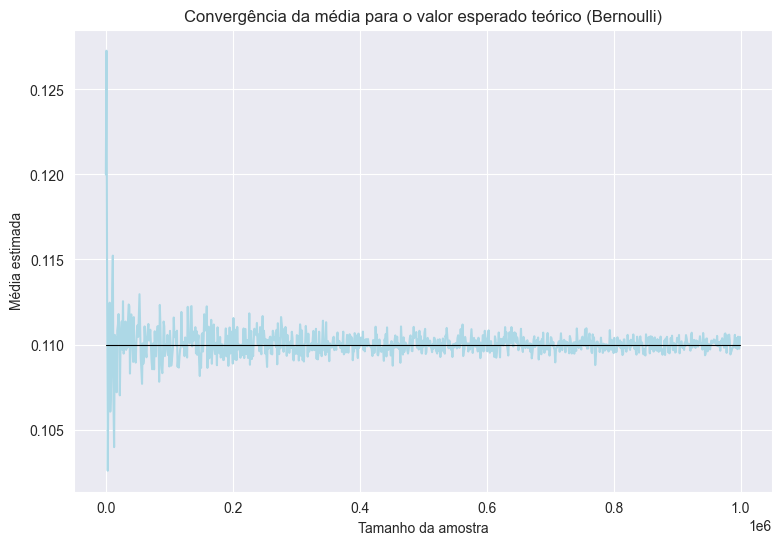

In [8]:
import numpy as np  # Biblioteca Python para matemática.
import matplotlib.pyplot as plt  # Biblioetca Python de visualização de dados.
import seaborn as sns  # Biblioteca Python de visualização de dados.

tamanho_amostras = list(range(100, 1000000, 1000))  # Grid de diferentes tamanhos amostrais.
medias = [np.mean(bernoulli.rvs(probabilidade, size=n)) for n in tamanho_amostras]  # Médias aritméticas de cada amostra.

# Gráfico da média aritmética de cada amostra contra o tamanho da amostra:
plt.figure(figsize=(9, 6))
sns.lineplot(x=tamanho_amostras, y=medias, color='lightblue')
sns.lineplot(x=tamanho_amostras, y=[valor_esp for x in tamanho_amostras], color='black', linewidth=0.8)
plt.xlabel('Tamanho da amostra')
plt.ylabel('Média estimada')
plt.title('Convergência da média para o valor esperado teórico (Bernoulli)')

Caso queira tirar dúvidas sobre a implementação oda distribuição de Bernoulli, cheque a [documentação oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html) da biblioteca `scipy` 😃.

#### Exemplo de aplicação

Além da variável que identifica se houve contratção de um produto, temos as seguintes variáveis que devem seguir uma distribuição de Bernoulli aqui no Banco:

   1. **Prevenção a fraudes:** variável $Fraude$ que assume $Fraude = 1$ quando uma transação for fraudulenta e $Fraude = 0$ quando for idônea.
   
   2. **Relacionamento com clientes:** variável $Churn$ que assume $Churn = 1$ quando um cliente deixa de consumir um produto e $Churn = 0$ quando permanece em nossa base de clientes.
   
   3. **Modelagem de crédito:** variável $Default$ que assume $Default = 1$ quando um cliente deixa de pagar sua parcela de um financiamento e $Default = 0$ quando ele mantém mseus pagamentos regularmente.

In [9]:
import pandas as pd

dados = pd.read_csv('../Database/marketing_data.csv')
dados['sucesso_bin'] = dados['sucesso'].apply(lambda x: 1 if x == 'sim' else 0) # Criação da variável binária de distribuição de Bernoulli.

media = dados['sucesso_bin'].mean()  # Cálculo da média como estimativa do valor esperado.
freq_relativa = len(dados[dados['sucesso'] == 'sim']) / len(dados)  # Cálculo da frequência relativa como estimativa para probabilidade.

media == freq_relativa  # Igualdade das estimativas de probabilidade e valor esperado.

True

### Distribuição geométrica

#### Definições

Quando repetimos um experimento aleatório até que um evento de interesse aconteça, a contagem do número de repetições $\{1, 2, ...\}$ até esse sucesso é uma variável aleatória $X$ que tem **distribuição geométrica**.
<br>
Sendo $p$ a probabilidade da ocorência de sucesso, a **distribuição de probabilidade** de uma variável de distribuição geométrica $X$ é dada pela seguinte expressão matemática:

$P(X = x) = p(1 - p)^{x-1}$
<br>

Já o **valor esperado** dessa variável aleatória é:

$E(X) = 1/p$
<br>

Enquanto que a sua **variância** é dada por:

$Var(X) = (1-p)/p^2$
<br>

Novamente, o **principal parâmetro** de uma variável geométrica é a probabilidade de sucesso $p$.

#### Distribuição geométrica no Python

Visualizando a distribuição de probabilidade

Text(0.5, 1.0, 'Distribuição de probabilidade de uma variável geométrica')

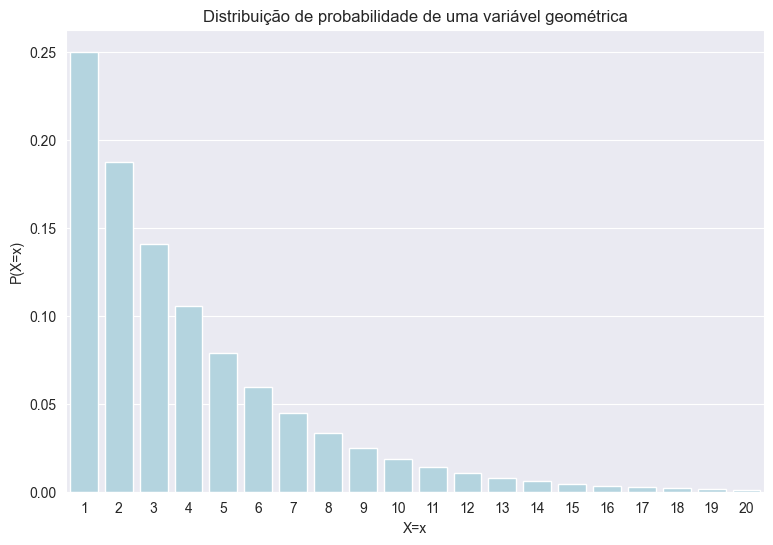

In [10]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.
from scipy.stats import geom # Função para construção de uma distribuição geométrica.

probabilidade = 0.25 # Parâmetro da probabilidade de sucesso do evento de interesse.

# Gráfico da distribuição de probabilidade de uma variável geométrica:
plt.figure(figsize=(9, 6))
sns.barplot(x=list(range(1, 21)), y=[geom.pmf(x, probabilidade) for x in range(1, 21)], color='lightblue')
plt.xlabel('X=x')
plt.ylabel('P(X=x)')
plt.title('Distribuição de probabilidade de uma variável geométrica')

Checando as medidas

In [11]:
from scipy.stats import geom # Função para construção de uma distribuição geométrica.

probabilidade = 0.25 # Parâmetro da probabilidade de sucesso do evento de interesse.

# Calculando as principais medidas dessa distribuição de probabilidade:
valor_esp, variancia = geom.stats(probabilidade)   # Média e variância da variável de distribuição geométrica.

print(f'Valor esperado: {valor_esp}')
print(f'Variância: {variancia}')

Valor esperado: 4.0
Variância: 12.0


In [12]:
valor_esp == 1 / probabilidade  # Checando a definição do valor esperado.

True

In [13]:
variancia == (1 - probabilidade) / probabilidade ** 2  # Checando a definição da variância.

True

Extraindo valores da distribuição

In [14]:
from scipy.stats import geom # Função para construção de uma distribuição geométrica.

probabilidade = 0.25 # Parâmetro da probabilidade de sucesso do evento de interesse.

# Simulando valores de uma distribuição geométrica:
simul = geom.rvs(probabilidade, size=100)  # Criando valores que são amostras de uma variável geométrica.
simul

array([ 3,  1,  5,  2,  5,  1,  2,  2,  2,  2,  1,  8,  1,  1,  3,  2,  1,
        5,  2,  4,  1,  3,  3,  5,  2,  1,  2,  3,  7, 12,  2,  8,  4,  1,
        3, 20,  6,  3,  3,  1,  4,  4,  6,  1,  4,  2,  3,  1,  1,  2,  8,
        7,  1,  1,  2,  2,  1,  1,  9, 10,  1,  2,  7,  1,  3,  2,  5,  1,
        2,  2,  4,  3,  2,  3, 12, 17,  9,  4,  5,  1,  5,  2,  1,  2,  2,
       11,  5,  1,  5,  1,  7,  4,  5,  2,  2,  1,  1,  2,  4,  1],
      dtype=int64)

Text(0.5, 1.0, 'Histograma dos valores simulados (geométrica)')

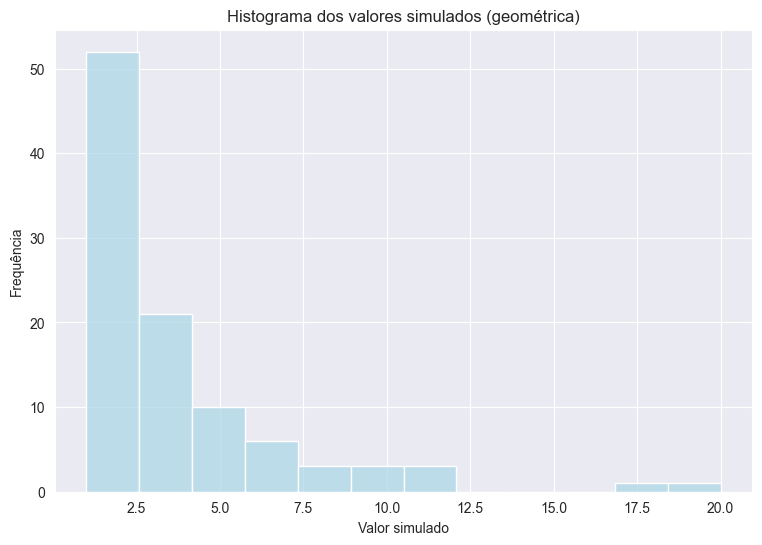

In [15]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.

# Gráfico do histograma dos valores simulados:
plt.figure(figsize=(9, 6))
sns.histplot(x=simul, color='lightblue')
plt.xlabel('Valor simulado')
plt.ylabel('Frequência')
plt.title('Histograma dos valores simulados (geométrica)')

Checando a lei dos grandes números

Text(0.5, 1.0, 'Convergência da média para o valor esperado teórico (geométrica)')

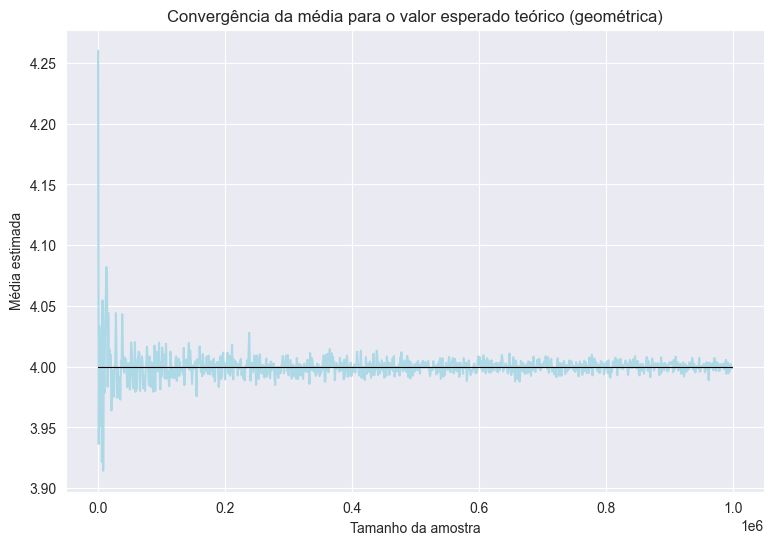

In [16]:
import numpy as np  # Biblioteca Python para matemática.
import matplotlib.pyplot as plt  # Biblioetca Python de visualização de dados.
import seaborn as sns  # Biblioteca Python de visualização de dados.

tamanho_amostras = list(range(100, 1000000, 1000))  # Grid de diferentes tamanhos amostrais.
medias = [np.mean(geom.rvs(probabilidade, size=n)) for n in tamanho_amostras]  # Médias aritméticas de cada amostra.

# Gráfico da média aritmética de cada amostra contra o tamanho da amostra:
plt.figure(figsize=(9, 6))
sns.lineplot(x=tamanho_amostras, y=medias, color='lightblue')
sns.lineplot(x=tamanho_amostras, y=[valor_esp for x in tamanho_amostras], color='black', linewidth=0.8)
plt.xlabel('Tamanho da amostra')
plt.ylabel('Média estimada')
plt.title('Convergência da média para o valor esperado teórico (geométrica)')

Caso queira tirar dúvidas sobre a implementação da distribuição geométrica, cheque a [documentação oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html) da biblioteca `scipy` 😃.

#### Exemplo de aplicação

1. **Relacionamento com clientes:** embora não seja a única forma de modelar este problema, podemos pensar no número de repetições do experimento em que uma pessoa gerente de agência liga para um cliente até que ele atenda a ligação. Supondo fixa em $p$ a probabilidade de que o cliente atenda a ligação, temos a seguinte função de probabilidade:

    $P(Tentativas = \#ligacoes) = p(1 - p)^{\#ligacoes - 1}$

### Distribuição de Poisson

#### Definições

Uma variável aleatória $X$ com **distribuição de Poisson** contabiliza o número de ocorrências $\{0, 1, 2, ...\}$ de algum evento de interesse em certa unidade de grandeza. Por exemplo, quantas ocorrências de um evento por dia (ou semana, mês, ano).
<br>
Se $X$ tem distribuição de Poisson com um parâmetro $\delta$, sua **função de probabilidade** é dada pela seguinte expressão:

$P(X = x) = e^{-\delta}\delta^x/x!$

Onde $e$ é a [constante de Euler](https://en.wikipedia.org/wiki/E_(mathematical_constant)) e $x!$ representa o fatorial do número $x$, ou seja, $x*(x-1)*(x-2)*...1$.
<br>
Podemos ter um entendimento intuitivo desse importante parâmetro $\delta$ a partir da definição do **valor esperado** de uma variável de Poisson $X$:

$E(X) = \delta$

Ou seja, $\delta$ é o número médio de ocorrências do nosso evento de interesse por unidade de tempo.
<br>
Além disso, a **variância** de uma variável de Poisson segue:

$Var(X) = \delta$
<br>

Fica claro com o **principal parâmetro** da distribuição de Poisson é a taxa de sucesso $\delta$.

#### Distribuição de Poisson no Python

Visualizando a distribuição de probabilidade

Text(0.5, 1.0, 'Distribuição de probabilidade de uma variável de Poisson')

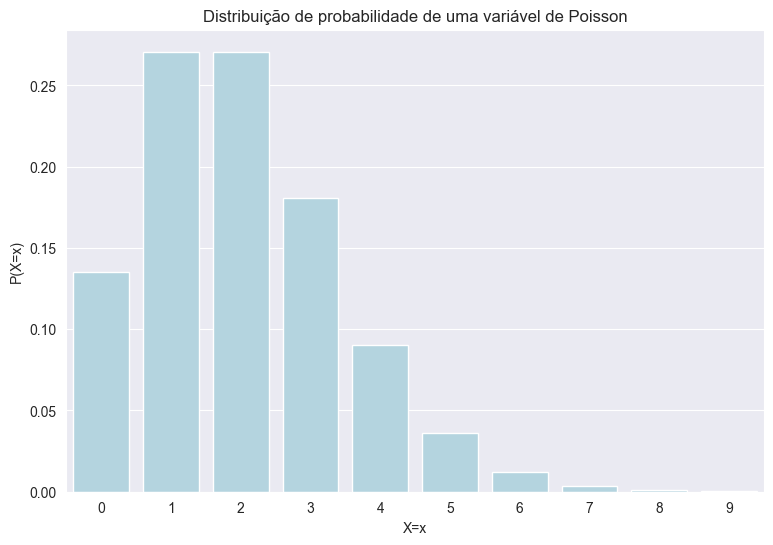

In [17]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.
from scipy.stats import poisson # Função para construção de uma distribuição de Poisson.

param = 2  # Parâmetro da taxa de ocorrência de um evento por unidade de tempo.

# Gráfico da distribuição de probabilidade de uma variável de Poisson:
plt.figure(figsize=(9, 6))
sns.barplot(x=list(range(0, 10)), y=[poisson.pmf(x, param) for x in range(0, 10)], color='lightblue')
plt.xlabel('X=x')
plt.ylabel('P(X=x)')
plt.title('Distribuição de probabilidade de uma variável de Poisson')

Checando as medidas descritivas

In [18]:
from scipy.stats import poisson # Função para construção de uma distribuição de Poisson.

param = 2  # Parâmetro da taxa de ocorrência de um evento por unidade de tempo.

# Calculando as principais medidas dessa distribuição de probabilidade:
valor_esp, variancia = poisson.stats(param)   # Média e variância da variável de distribuição de Poisson.

print(f'Valor esperado: {valor_esp}')
print(f'Variância: {variancia}')

Valor esperado: 2.0
Variância: 2.0


In [19]:
valor_esp == param  # Checando a definição do valor esperado.

True

In [20]:
variancia == param  # Checando a definição da variância.

True

Extraindo valores da distribuição

In [21]:
from scipy.stats import poisson # Função para construção de uma distribuição de Poisson.

param = 2  # Parâmetro da taxa de ocorrência de um evento por unidade de tempo.

# Simulando valores de uma distribuição de Poisson:
simul = poisson.rvs(param, size=100)  # Criando valores que são amostras de uma variável de Poisson.
simul

array([1, 1, 3, 2, 1, 2, 0, 2, 1, 3, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 5, 2,
       2, 4, 4, 1, 0, 1, 3, 0, 1, 2, 3, 5, 1, 2, 3, 3, 4, 3, 0, 3, 3, 3,
       4, 1, 2, 1, 0, 3, 1, 0, 1, 3, 2, 1, 3, 1, 3, 4, 2, 1, 0, 3, 1, 3,
       2, 2, 0, 2, 5, 3, 2, 2, 4, 2, 1, 1, 5, 1, 6, 1, 5, 1, 1, 4, 1, 3,
       1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 4, 4], dtype=int64)

Text(0.5, 1.0, 'Histograma dos valores simulados (Poisson)')

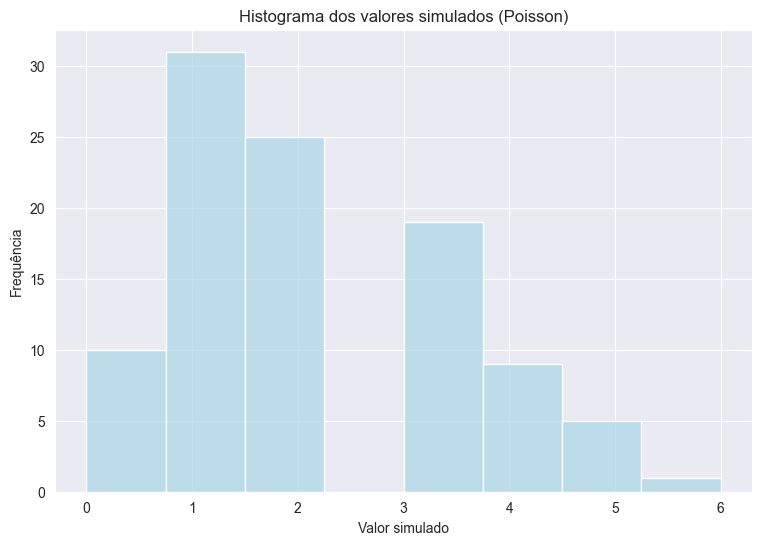

In [22]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.

# Gráfico do histograma dos valores simulados:
plt.figure(figsize=(9, 6))
sns.histplot(x=simul, color='lightblue')
plt.xlabel('Valor simulado')
plt.ylabel('Frequência')
plt.title('Histograma dos valores simulados (Poisson)')

Checando a lei dos grandes números

Text(0.5, 1.0, 'Convergência da média para o valor esperado teórico (Poisson)')

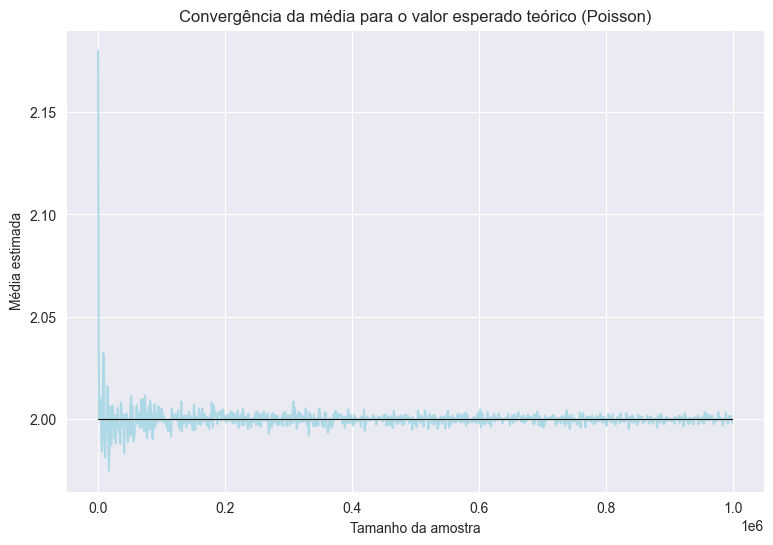

In [23]:
import numpy as np  # Biblioteca Python para matemática.
import matplotlib.pyplot as plt  # Biblioetca Python de visualização de dados.
import seaborn as sns  # Biblioteca Python de visualização de dados.

tamanho_amostras = list(range(100, 1000000, 1000))  # Grid de diferentes tamanhos amostrais.
medias = [np.mean(poisson.rvs(param, size=n)) for n in tamanho_amostras]  # Médias aritméticas de cada amostra.

# Gráfico da média aritmética de cada amostra contra o tamanho da amostra:
plt.figure(figsize=(9, 6))
sns.lineplot(x=tamanho_amostras, y=medias, color='lightblue')
sns.lineplot(x=tamanho_amostras, y=[valor_esp for x in tamanho_amostras], color='black', linewidth=0.8)
plt.xlabel('Tamanho da amostra')
plt.ylabel('Média estimada')
plt.title('Convergência da média para o valor esperado teórico (Poisson)')

Caso queira tirar dúvidas sobre a implementação da distribuição de Poisson, cheque a [documentação oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) da biblioteca `scipy`😃.

#### Exemplo de aplicação

1. **Ouvidoria:** podemos estar interessados em entender a incerteza quanto ao número de reclamações de clientes junto ao Banco Central a cada mês. Nesse caso, supondo que a taxa histórica de reclamações por mês seja dada por $\delta$, então a distribuição de probabilidade em que estamos interessados é dada por:

    $P(Reclamacoes / mes = x) = e^{-\delta}\delta^x/x!$

2. **Disponibilidade de serviços nos apps:** de modo semelhante, podemos querer modelar a probabilidade de que ocorra um dado número de períodos de indisponibilidade nos nossos apps a cada mês, a partir de uma taxa histórica de $\delta$ ocorrências de indisponibilidade por mês.

    $P(Indisponibilidade / mes = x) = e^{-\delta}\delta^x/x!$

<a id='continuas'></a>

## Variáveis aleatórias contínuas

<a id='normal'></a>

### Distribuição normal

#### Definições

A **distribuição normal** é, a principal de toda a teoria da probabilidade. Inclusive, há um resultado muito importante na Estatística, denominado [**Teorema Central do Limite**](https://en.wikipedia.org/wiki/Central_limit_theorem), que indica que a distribuição da média amostral de *qualquer variável aleatória* converge para a distribuição normal quando o tamanaho de amostra cresce indefinidamente. Isso implica que podemos utilizar a distribuição normal para inúmeras aplicações, como veremos ao longo desta trilha de Business Analytics.
<br>
Como a distribuição normal é contínua, sua principal função de probabilidade é a **função densidade de probabilidade**, dada pela seguinte expressão:

$F(x) = \frac{1}{\sqrt{2\pi}\sigma^2}exp[(-1 / 2)(x - \mu)^2/\sigma^2]$

Onde $\mu$ é o valor esperado da variável $X$ de distribuição normal e $\sigma^2$ é a sua variância.
<br>

Fica claro como os **principais parâmetros** de uma distribuição normal são o valor esperado, $\mu$, e o desvio padrão, $\sigma$.

#### Distribuição normal no Python

Visualizando a distribuição de probabilidade

Text(0.5, 1.0, 'Distribuição de probabilidade de uma variável normal')

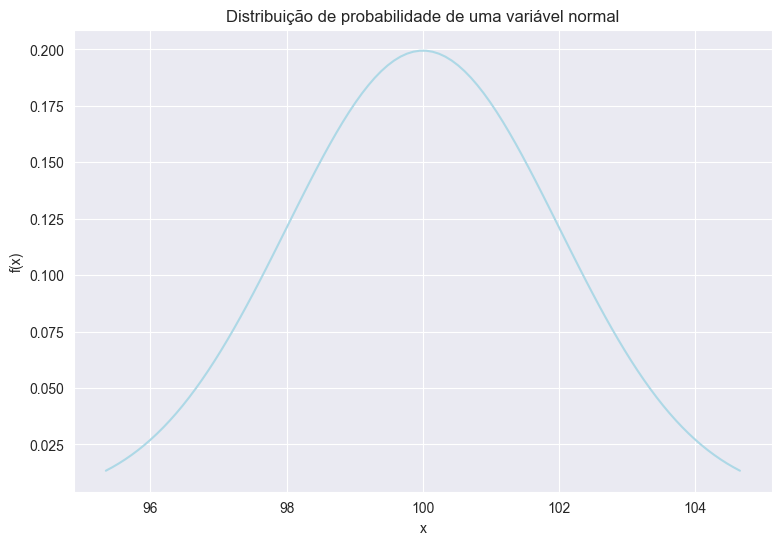

In [24]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.
from scipy.stats import norm # Função para construção de uma distribuição normal.
import numpy as np

valor_esperado = 100  # Valor esperado da distribuição normal.
desvio_padrao = 2  # Desvio padrão da distribuição normal.
dominio = np.linspace(norm.ppf(0.01, valor_esperado, desvio_padrao), norm.ppf(0.99, valor_esperado, desvio_padrao), 100)

# Gráfico da distribuição de probabilidade de uma variável normal:
plt.figure(figsize=(9, 6))
sns.lineplot(x=dominio, y=norm.pdf(dominio, valor_esperado, desvio_padrao), color='lightblue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Distribuição de probabilidade de uma variável normal')

Checando as medidas descritivas

In [25]:
from scipy.stats import norm # Função para construção de uma distribuição normal.

valor_esperado = 100  # Valor esperado da distribuição normal.
desvio_padrao = 2  # Desvio padrão da distribuição normal.

# Calculando as principais medidas dessa distribuição de probabilidade:
valor_esp, variancia = norm.stats(valor_esperado, desvio_padrao)   # Média e variância da variável de distribuição normal.

print(f'Valor esperado: {valor_esp}')
print(f'Variância: {variancia}')

Valor esperado: 100.0
Variância: 4.0


In [26]:
valor_esp == valor_esperado  # Checando a definição do valor esperado.

True

In [27]:
variancia == desvio_padrao ** 2  # Checando a definição da variância.

True

Extraindo valores da distribuição

In [28]:
from scipy.stats import norm # Função para construção de uma distribuição normal.

valor_esperado = 100  # Valor esperado da distribuição normal.
desvio_padrao = 2  # Desvio padrão da distribuição normal.

# Simulando valores de uma distribuição normal:
simul = norm.rvs(valor_esperado, desvio_padrao, size=100)  # Criando valores que são amostras de uma variável normal.
simul

array([100.72004619, 101.01192664, 100.31400123,  99.01880847,
       101.27588676,  99.4319843 , 100.23079073,  98.50978131,
        97.35712111,  98.20716003, 100.50239993, 100.25657206,
       100.84716861,  98.461872  , 102.68426002,  99.40779479,
        99.15839951, 101.08851561, 100.43732208,  98.8223121 ,
        98.42015383,  97.18354631, 101.72964013,  97.10299658,
        98.68646796, 104.7628705 ,  99.19968116,  99.5647132 ,
       103.97627626, 102.91068355, 101.63272071, 100.93223144,
        99.42129798, 100.30870174, 101.92803975,  97.72745478,
       103.20831846, 101.2080826 , 100.3168485 , 101.63384925,
        98.48562216, 100.94253255, 102.67441553,  99.68933606,
       100.77974211, 101.15812167,  97.34957592,  98.1338014 ,
       103.06996049, 100.22979676, 100.42009241,  99.22435094,
       100.8672497 , 100.94184024, 103.14888663,  99.91344442,
        97.88976956, 100.95864678, 101.88668711, 105.46290901,
       100.59025075, 101.51045884,  99.13210224,  98.24

Text(0.5, 1.0, 'Histograma dos valores simulados (normal)')

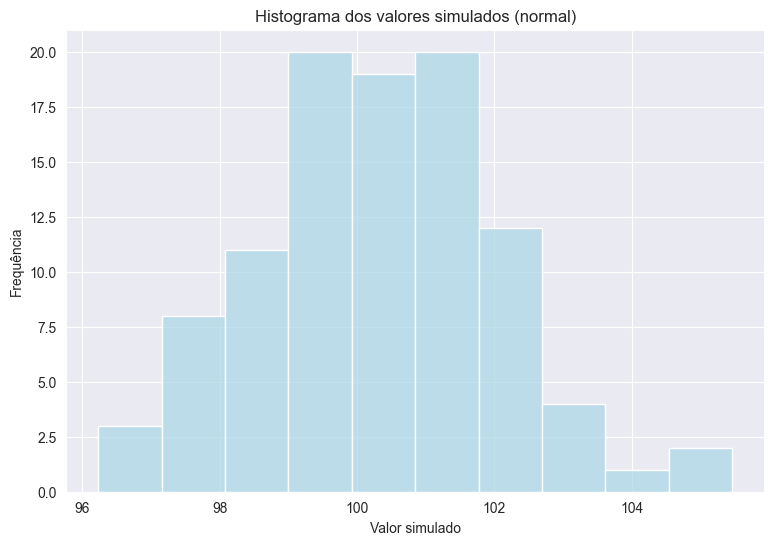

In [29]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.

# Gráfico do histograma dos valores simulados:
plt.figure(figsize=(9, 6))
sns.histplot(x=simul, color='lightblue')
plt.xlabel('Valor simulado')
plt.ylabel('Frequência')
plt.title('Histograma dos valores simulados (normal)')

Checando a lei dos grandes números

Text(0.5, 1.0, 'Convergência da média para o valor esperado teórico (normal)')

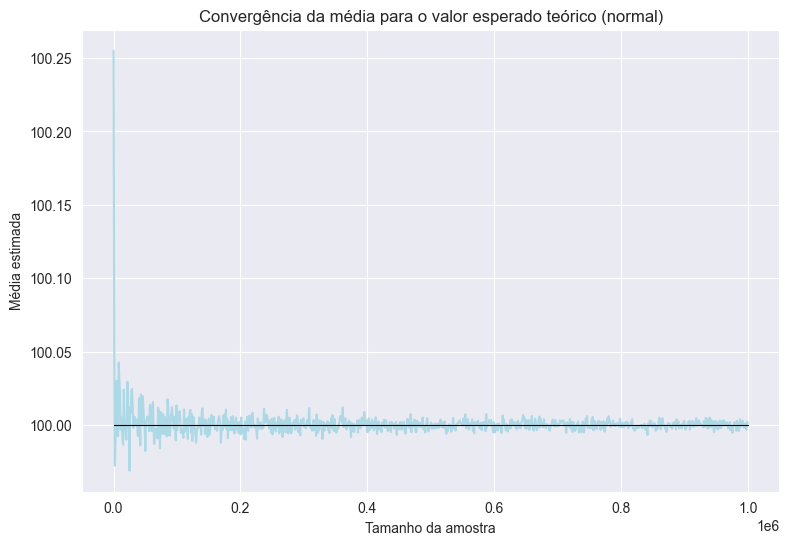

In [30]:
import numpy as np  # Biblioteca Python para matemática.
import matplotlib.pyplot as plt  # Biblioetca Python de visualização de dados.
import seaborn as sns  # Biblioteca Python de visualização de dados.

tamanho_amostras = list(range(100, 1000000, 1000))  # Grid de diferentes tamanhos amostrais.
medias = [np.mean(norm.rvs(valor_esperado, desvio_padrao, size=n)) for n in tamanho_amostras]  # Médias aritméticas de cada amostra.

# Gráfico da média aritmética de cada amostra contra o tamanho da amostra:
plt.figure(figsize=(9, 6))
sns.lineplot(x=tamanho_amostras, y=medias, color='lightblue')
sns.lineplot(x=tamanho_amostras, y=[valor_esp for x in tamanho_amostras], color='black', linewidth=0.8)
plt.xlabel('Tamanho da amostra')
plt.ylabel('Média estimada')
plt.title('Convergência da média para o valor esperado teórico (normal)')

Caso queira tirar dúvidas sobre a implementação da distribuição normal, cheque a [documentação oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) da biblioteca `scipy` 😃.

#### Exemplo de aplicação

Principalmente por conta do **Teorema Central do Limite**, há diversas *aplicações metodológicas* da distribuição normal:

1. Inúmeras **aplicações básicas (teóricas e práticas)** dentro do ramo da inferência estatística: principalmente, intervaloos de confiança e testes de hipótese.
2. Outras diversas **aplicações avançadas (teóricas e práticas)**, da inferência causal à análise preditiva e prescritiva, também assumem a distribuição normal para as variáveis envolvidas.

#### Comentário sobre a distribuição t-Student

Ao longo dos conteúdos de inferência estatística (intervalos de confiança a testes de hipótese), veremos sobre a [distribuição t de Student](https://en.wikipedia.org/wiki/Student%27s_t-distribution), uma distribuição "irmã" da normal que é usada em circustâncias especifícas (como quando não sabemos a variância da população de uma variável aleatória).

<a id='adicionais'></a>

### Distribuição uniforme

#### Definições

A **distribuição uniforme** é a mais simples dentre as distribuições contínuas. Ela assume que uma variável $X$ pode assumir qualquer valor em um intervalo $[a, b]$, todos eles com a mesma chance de ocorrência (por isso o termo *uniforme*). A ** função de densidade de probabilidade** dessa variável é dada por:

$f(x) = \frac{1}{b - a}$

Para $x$ no intervalo $[a, b]$.
<br>
Quanto ao **valor esperado** e à **variância** de $X$.

$E(X) = \frac{a + b}{2}$

$Var(X) = \frac{(b - a)^2}{12}$

#### Distribuição uniforme no Python

Visualizando a distribuição de probabilidade

Text(0.5, 1.0, 'Distribuição de probabilidade de uma variável uniforme')

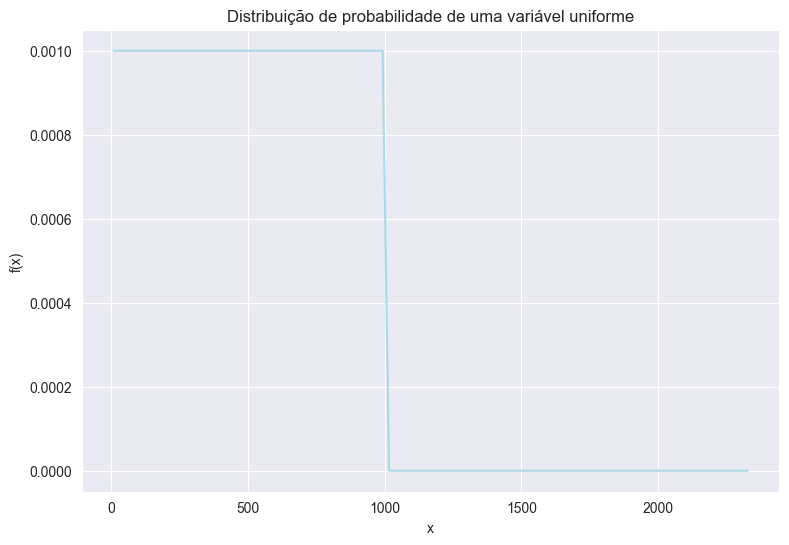

In [31]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.
from scipy.stats import uniform # Função para construção de uma distribuição uniforme.
import numpy as np

minimo = 0  # parâmetro do primeiro valor do intervalo de distribuição uniforme.
escala = 1000   # Parâmetro da escala do intervalo de distribuição uniforme.
dominio = np.linspace(uniform.ppf(0.01, minimo, escala),norm.ppf(0.99, minimo, escala), 100)

# Gráfico da distribuição de probabilidade de uma variável uniforme:
plt.figure(figsize=(9, 6))
sns.lineplot(x=dominio, y=uniform.pdf(dominio, minimo, escala), color='lightblue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Distribuição de probabilidade de uma variável uniforme')

Checando as medidas descritivas

In [32]:
from scipy.stats import uniform # Função para construção de uma distribuição uniforme.

minimo = 0  # parâmetro do primeiro valor do intervalo de distribuição uniforme.
escala = 1000   # Parâmetro da escala do intervalo de distribuição uniforme.

# Calculando as principais medidas dessa distribuição de probabilidade:
valor_esp, variancia = uniform.stats(minimo, escala)   # Média e variância da variável de distribuição geométrica

print(f'Valor esperado: {valor_esp}')
print(f'Variância: {variancia}')

Valor esperado: 500.0
Variância: 83333.33333333333


In [33]:
valor_esp == (1000 + 0) / 2  # Checando a definição do valor esperado.

True

In [34]:
variancia == ((1000 - 0) ** 2) / 12  # Checando a definição da variância.

True

Extraindo valores da distribuição

In [35]:
from scipy.stats import uniform # Função para construção de uma distribuição uniforme.

minimo = 0  # parâmetro do primeiro valor do intervalo de distribuição uniforme.
escala = 1000   # Parâmetro da escala do intervalo de distribuição uniforme.

# Simulando valores de uma distribuição uniforme:
simul = uniform.rvs(minimo, escala, size=100)  # Criando valores que são amostras de uma variável uniforme.
simul

array([490.05185463, 984.59235454, 137.09081129, 466.99191345,
        44.00259448, 129.58287339, 542.86717178, 886.4382588 ,
       195.01505435, 609.24590406, 635.20689957, 241.60114218,
       764.06481081, 676.74208138, 461.14639158, 786.75229049,
       254.90541451, 933.84048521, 439.60062509, 957.19184347,
        17.60009422, 464.13157303, 160.01702861, 457.30996403,
       458.45629472, 877.70977699, 169.23697651, 845.24993688,
        79.17818638, 998.6933505 , 603.59018032, 213.72684405,
       956.4302768 , 841.26524399, 966.22360269, 261.63306217,
        82.4293647 , 243.09415802, 128.69052135, 849.13282119,
       681.35492415, 525.34800729, 812.24001355,  61.92682893,
       603.33453806, 492.40421255, 318.54382907, 369.1940754 ,
        44.8500976 , 783.49744427, 471.3114112 , 606.44469198,
       341.60464048, 936.34105368, 174.41168922,  83.48844141,
       194.66978022, 243.63698285, 588.45195679, 430.47143716,
       603.81993419, 580.53243363, 409.66052451, 993.79

Text(0.5, 1.0, 'Histograma dos valores simulados (uniforme)')

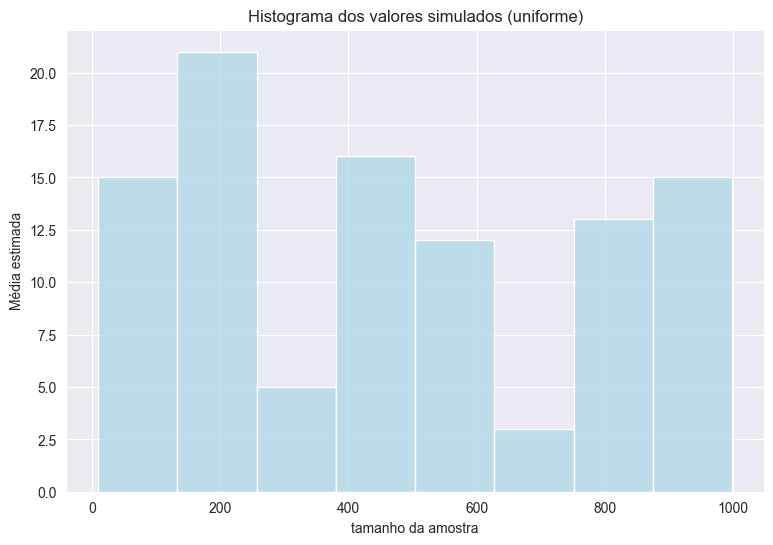

In [36]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.

# Gráfico do histograma dos valores simulados:
plt.figure(figsize=(9, 6))
sns.histplot(x=simul, color='lightblue')
plt.xlabel('tamanho da amostra')
plt.ylabel('Média estimada')
plt.title('Histograma dos valores simulados (uniforme)')

Checando a lei dos grandes números

Text(0.5, 1.0, 'Convergência da média para o valor esperado teórico (uniforme)')

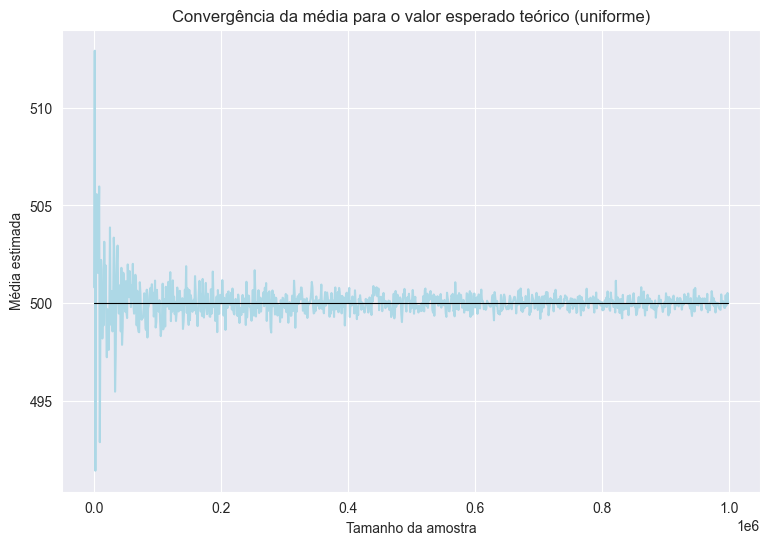

In [37]:
import numpy as np  # Biblioteca Python para matemática.
import matplotlib.pyplot as plt  # Biblioetca Python de visualização de dados.
import seaborn as sns  # Biblioteca Python de visualização de dados.

tamanho_amostras = list(range(100, 1000000, 1000))  # Grid de diferentes tamanhos amostrais.
medias = [np.mean(uniform.rvs(minimo, escala, size=n)) for n in tamanho_amostras]  # Médias aritméticas de cada amostra.

# Gráfico da média aritmética de cada amostra contra o tamanho da amostra:
plt.figure(figsize=(9, 6))
sns.lineplot(x=tamanho_amostras, y=medias, color='lightblue')
sns.lineplot(x=tamanho_amostras, y=[valor_esp for x in tamanho_amostras], color='black', linewidth=0.8)
plt.xlabel('Tamanho da amostra')
plt.ylabel('Média estimada')
plt.title('Convergência da média para o valor esperado teórico (uniforme)')

Caso queira tirar dúvidas sobre a implementação da distribuição uniforme, cheque a [documentação oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) da biblioteca `scipy` 😃.

#### Exemplo de aplicação

Um exemplo simples de uso da distribuição uniforme é o sorteio de um valor qualquer dentre um intervalo pré-definido.

1. **Teste A/B:** podemos definir aleatoriamente qual cliente terá, por exemplo, a possibilidade de usar uma nova versão de um app a partir da atribuição, para cada cliente, de um valor extraído de uma distribuição uniforme. Aqueles clientes com um valor sorteaado superior a certo limiar pré-definido recebem uma notificação para atualizar o app, enquanto que os demais não recebem essa possibilidade.

<a id='adicionais'></a>

## Tópicos adicionais

<a id='adicionais'></a>

### Medidas adicionais de uma distribuição: simetria e curtose

#### Simetria de uma distribuição

A [simetria](https://en.wikipedia.org/wiki/Skewness) é uma medida que descreve o formato de uma distribuição à direita e à esquerda de seu valor médio.

Text(0.5, 1.0, 'Variável normal simétrica')

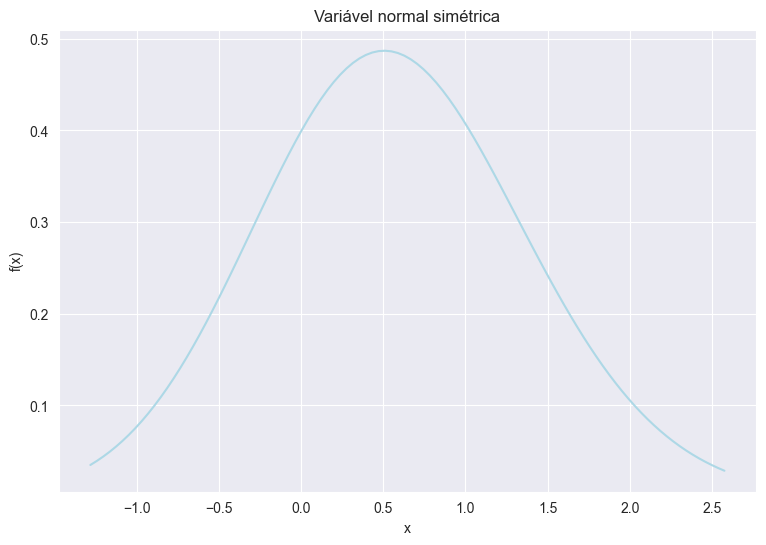

In [38]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.
from scipy.stats import skewnorm # Função para construção de uma distribuição assimétrica.
import numpy as np

simetria = 1
dominio = np.linspace(skewnorm.ppf(0.01, simetria), skewnorm.ppf(0.99, simetria), 100)

# Gráfico da distribuição de probabilidade de uma variável normal:
plt.figure(figsize=(9, 6))
sns.lineplot(x=dominio, y=skewnorm.pdf(dominio, simetria), color='lightblue')
plt.xlabel('X=x')
plt.ylabel('f(x)')
plt.title('Variável normal simétrica')

Text(0.5, 1.0, 'Variável normal assimétrica à esquerda (assimetria negativa)')

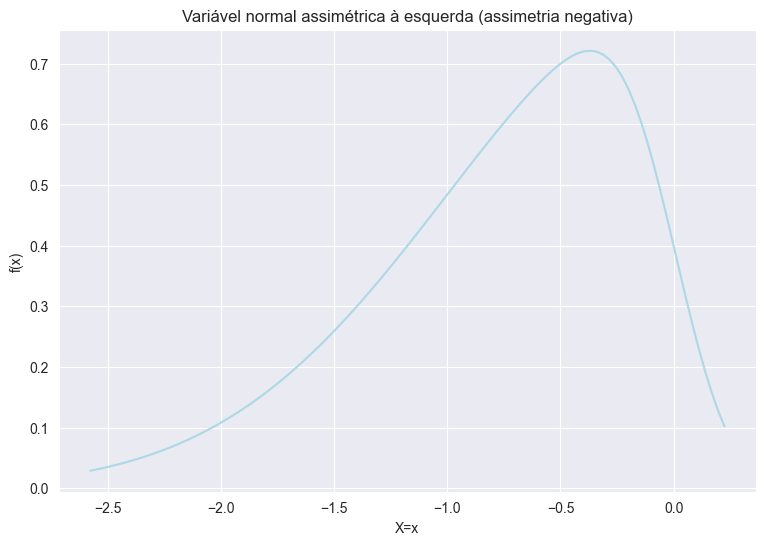

In [39]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.
from scipy.stats import skewnorm # Função para construção de uma distribuição assimétrica.
import numpy as np

simetria = -5
dominio = np.linspace(skewnorm.ppf(0.01, simetria), skewnorm.ppf(0.99, simetria), 100)

# Gráfico da distribuição de probabilidade de uma variável normal:
plt.figure(figsize=(9, 6))
sns.lineplot(x=dominio, y=skewnorm.pdf(dominio, simetria), color='lightblue')
plt.xlabel('X=x')
plt.ylabel('f(x)')
plt.title('Variável normal assimétrica à esquerda (assimetria negativa)')

Text(0.5, 1.0, 'Variável normal assimétrica à direita (assimetria positiva)')

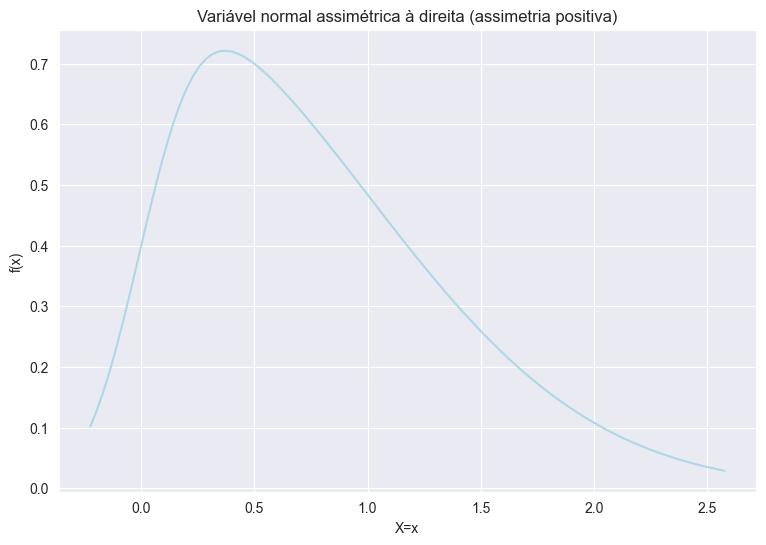

In [40]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.
from scipy.stats import skewnorm # Função para construção de uma distribuição assimétrica.
import numpy as np

simetria = 5
dominio = np.linspace(skewnorm.ppf(0.01, simetria), skewnorm.ppf(0.99, simetria), 100)

# Gráfico da distribuição de probabilidade de uma variável normal:
plt.figure(figsize=(9, 6))
sns.lineplot(x=dominio, y=skewnorm.pdf(dominio, simetria), color='lightblue')
plt.xlabel('X=x')
plt.ylabel('f(x)')
plt.title('Variável normal assimétrica à direita (assimetria positiva)')

#### Curtose de uma distribuição

A [curtose](https://en.wikipedia.org/wiki/Kurtosis) é uma medida que descreve o achatamento de uma distribuição.

Text(0.5, 1.0, 'Distribuições com diferentes valores de curtose')

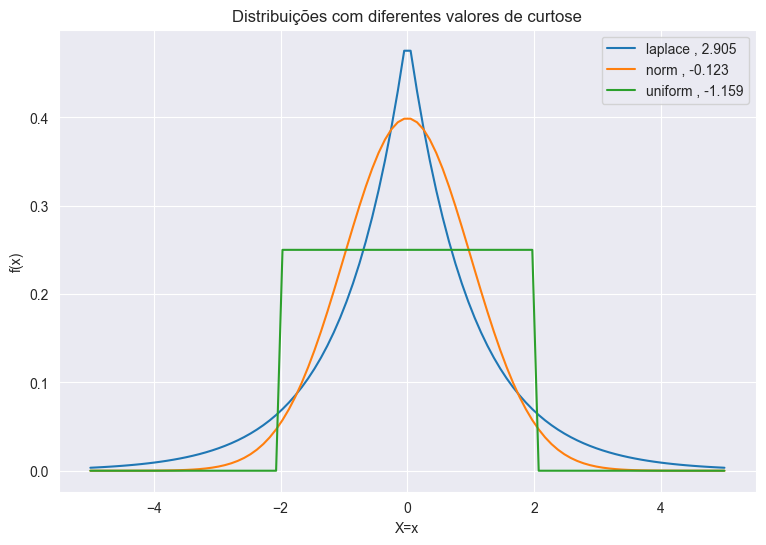

In [42]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis

plt.figure(figsize=(9, 6))

x = np.linspace(-5, 5, 100)
ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']

for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label='{} , {}'.format(distname, round(kur, 3)))
    ax.legend()

plt.xlabel('X=x')
plt.ylabel('f(x)')
plt.title('Distribuições com diferentes valores de curtose')

<a id='adicionais'></a>

### Distribuição bi-modais

In [43]:
from scipy.stats import norm # Função para construção de uma distribuição normal.

valor_esperado1 = 100  # Valor esperado da distribuição normal 1.
desvio_padrao1 = 3  # Desvio padrão da distribuição normal 1.

# Simulando valores de uma distribuição normal:
simul1 = norm.rvs(valor_esperado1, desvio_padrao1, size=1000)  # Criando valores que são amostras de uma variável normal.

valor_esperado2 = 120  # Valor esperado da distribuição normal 2.
desvio_padrao2 = 1  # Desvio padrão da distribuição normal 2.

# Simulando valores de uma distribuição normal:
simul2 = norm.rvs(valor_esperado2, desvio_padrao2, size=1000)  # Criando valores que são amostras de uma variável normal.

# juntando os valores de duas distribuições distintas:
simul = []

for valores in [simul1, simul2]:
    for x in valores:
        simul.append(x)

Text(0.5, 1.0, 'Histograma dos valores simulados (Normal bi-modal)')

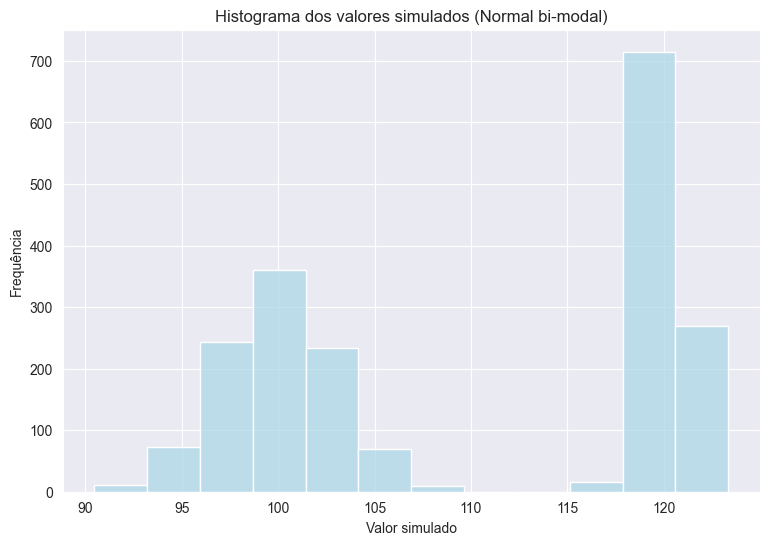

In [44]:
import matplotlib.pyplot as plt # Biblioetca Python de visualização de dados.
import seaborn as sns # Biblioteca Python de visualização de dados.

# Gráfico do histograma dos valores simulados:
plt.figure(figsize=(9, 6))
sns.histplot(x=simul, color='lightblue')
plt.xlabel('Valor simulado')
plt.ylabel('Frequência')
plt.title('Histograma dos valores simulados (Normal bi-modal)')